In [1]:
pip -q install pandas seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

Lets import the titanic data set. you can pass urls directly to panda's `pd.read_csv()` function

In [3]:
# lets read the titanic.csv data set
titanic=pd.read_csv('https://raw.githubusercontent.com/jorisvandenbossche/pandas-tutorial/master/data/titanic.csv')

lets peek at the first couple of lines:

In [4]:
print(len(titanic)) # 891 lines
titanic.head()

891


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Too many columns to read clearly, lets just look at the column names

In [5]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

lets make all the columns lower case so that's it is easier to type them

In [6]:
titanic.columns = titanic.columns.str.lower()
titanic.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Not sure what the 'Parch', 'Embarked' and 'SibSp' columns are. lets look at the unique values these columns have

In [7]:
print(titanic.parch.unique())
print(titanic.sibsp.unique())
print(titanic.embarked.unique())

[0 1 2 5 3 4 6]
[1 0 3 4 2 5 8]
['S' 'C' 'Q' nan]


can't figure out what these columns mean, so drop them.
also ticket, cabin, PassengerId, name columns also seem rather dull, lets drop them too.

In [8]:
titanic = titanic.drop(axis='columns', labels=[
    'ticket', 'cabin', 'passengerid', 'name', 'parch', 'sibsp', 'embarked'])

In [9]:
titanic.head(10)

,survived,pclass,sex,age,fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
5,0,3,male,NaN,8.4583
6,0,1,male,54.0,51.8625
7,0,3,male,2.0,21.0750
8,1,3,female,27.0,11.1333
9,1,2,female,14.0,30.0708


I see a NaN value in the age column in row 5, lets take a closer look

In [10]:
nan_age = titanic.iloc[5].age
print(nan_age, type(nan_age))

nan <class 'numpy.float64'>


oh I think it is an numpy `np.nan` value. <br>
we can check for nan with `np.isnan()` function

In [11]:
import numpy as np
print(np.nan)
np.isnan(nan_age)

nan


True

how many rows have NaN values?

In [12]:
from IPython.display import display, HTML

# which values are nan?
value_is_nan = titanic.isnull()
display(value_is_nan.head())

# which rows have at least one nan?
rows_with_nan = titanic.isnull().any(axis='columns')
display(rows_with_nan.head())
print(rows_with_nan.sum()) # 177 rows with NaN

# negate booleans in the rows_with_nan mask
rows_without_nan = ~rows_with_nan

# remove rows with nans
titanic_without_nans = titanic[rows_without_nan]
display(titanic_without_nans.head(10))
print(len(titanic_without_nans)) # 714 rows left

,survived,pclass,sex,age,fare
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False


0    False
1    False
2    False
3    False
4    False
dtype: bool

177


,survived,pclass,sex,age,fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
6,0,1,male,54.0,51.8625
7,0,3,male,2.0,21.0750
8,1,3,female,27.0,11.1333
9,1,2,female,14.0,30.0708
10,1,3,female,4.0,16.7000


714


now lets fix survived column to be 'died' / 'survived' as a categorical type.
> use categorical rather than bool because bool doesnt work well in numpy/seaborn plots 

In [13]:
titanic = titanic_without_nans
titanic.survived = titanic.survived.replace({0 : 'died', 1 : 'survived'}).astype('category').cat.as_ordered()
titanic.head()

,survived,pclass,sex,age,fare
0,died,3,male,22.0,7.2500
1,survived,1,female,38.0,71.2833
2,survived,3,female,26.0,7.9250
3,survived,1,female,35.0,53.1000
4,died,3,male,35.0,8.0500


what are the datatype used for the rest of the columns?

In [14]:
titanic.dtypes

survived    category
pclass         int64
sex           object
age          float64
fare         float64
dtype: object

sex should be a categorical value rather than object

In [15]:
titanic.sex = titanic.sex.astype('category')
print(titanic.dtypes)
titanic.head()

survived    category
pclass         int64
sex         category
age          float64
fare         float64
dtype: object


,survived,pclass,sex,age,fare
0,died,3,male,22.0,7.2500
1,survived,1,female,38.0,71.2833
2,survived,3,female,26.0,7.9250
3,survived,1,female,35.0,53.1000
4,died,3,male,35.0,8.0500


pclass should be an __ordered__ __categorical__ value rather than a number

In [16]:
titanic.pclass = titanic.pclass.astype('category').cat.as_ordered()
print(titanic.dtypes)


survived    category
pclass      category
sex         category
age          float64
fare         float64
dtype: object


Lets plot some stuff and do exploratory analysis

In [17]:
import seaborn as sns
sns.pairplot(data=titanic, hue='survived', palette='pastel')

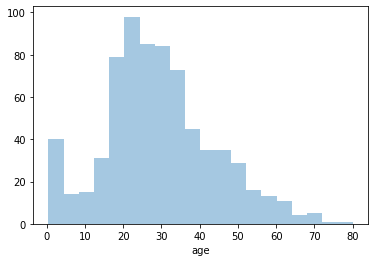

In [18]:
sns.distplot(titanic.age, kde=False, bins=20)

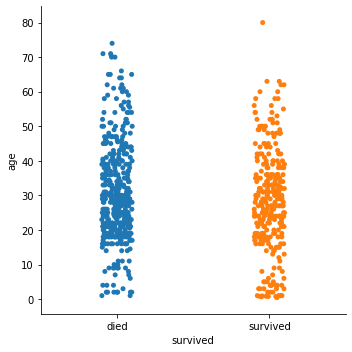

In [19]:
sns.catplot(y="age", x="survived", data=titanic)

interesting, most of the people that died are from third class. <br>
lets see how fare plays into survival and class

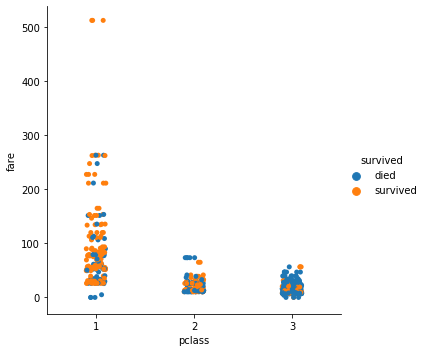

In [20]:
sns.catplot(x="pclass", y="fare", hue='survived', data=titanic)

oh no! there are outliers of fare above 500 which ruin our graph!
lets just remove from graph

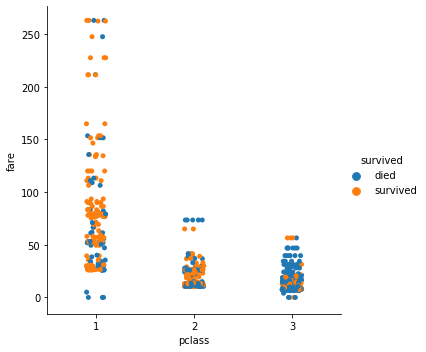

In [21]:
sns.catplot(x="pclass", y="fare", hue='survived', data=titanic[titanic.fare<400])

In [26]:
titanic.survived = titanic.survived.replace({'died' :0, 'survived':1})

In [61]:

#pv = titanic.groupby(['pclass', 'sex', 'survived'])['age'].mean().unstack(['pclass',])
#pv = titanic.set_index('age', append=True)#.groupby(['pclass', 'sex']).mean().unstack(['pclass', 'sex'])
#pv = titanic.set_index('age', append=True)
pv = titanic
pv = pv.set_index('age')
pv = pv.pivot(columns='pclass')

#pv = pv.pivot(columns='sex')
#pv = pv.pivot(columns='sex')
#pv = titanic.groupby(['pclass', 'sex']).mean()
#pv = titanic.groupby(['pclass', 'sex']).mean()[['survived', 'age']]
#pv = pv.set_index('age', append=True).unstack(['pclass', 'sex'])
display(pv)

ValueError: Index contains duplicate entries, cannot reshape